In [1]:
import torch
import pandas as pd
from tqdm.notebook import trange, tqdm
import seaborn as sns
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import math
import copy
import torch
import torch.nn as nn
import torch.nn.functional as F
import random
import pandas as pd
import numpy as np
from   sklearn.preprocessing   import LabelEncoder          # кодировка категорий
import pandas as pd
from torch.autograd import Variable
import numpy as np
import torch.functional as F
from   sklearn.preprocessing   import LabelEncoder          # кодировка категорий
from   sklearn.decomposition import PCA
from   sklearn import linear_model
import matplotlib.pyplot as plt                   # постороение графиков
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import torch.optim as optim
import torch
from torch.utils.data import DataLoader, TensorDataset
import transformers
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaModel, RobertaTokenizer
import logging
logging.basicConfig(level=logging.ERROR)
import torch
import pandas as pd
from sklearn.metrics.pairwise import cosine_distances
from sklearn.neighbors import NearestNeighbors

In [2]:
# Setting up the device for GPU usage
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

In [3]:
# Читаем файл с компетенциями
dfHS = pd.read_excel('DATASET_BALANCE_CLASS4.xlsx')

In [4]:
dfHS['SKILLS'] = dfHS['SKILLS'].astype(str)
# Длинна каждого посчитаем длинну
dfHS['list_of_skill'] = dfHS['SKILLS'].apply(lambda x: x.split(','))
dfHS['cnt_skill'] = dfHS['list_of_skill'].apply(lambda x: len(x))

In [5]:
df_skill = dfHS[(dfHS.cnt_skill > 4) & (dfHS.cnt_skill < 16)]

In [6]:
len(df_skill)

16729

In [7]:
embeddings = torch.load('embeddings.pth', map_location=torch.device('cpu'))

In [8]:
embeddings[0]

tensor([9.3875, 9.9098, 9.9899, 9.3184, 6.9727, 0.2576, 9.7376, 8.5665, 5.7270,
        0.7439, 0.3846, 1.0711, 2.6154, 2.1553, 5.0674, 2.9318, 5.4648, 0.7262,
        2.2338, 6.1609, 6.2313, 5.4893, 3.9408, 1.3311])

In [9]:
# Читаем файл с компетенциями
vocab = pd.read_excel('df_vocabulary_tensor.xlsx')

In [10]:
vocab.head(3)

,id_skill,skill
0,0,ЯНДЕКС МЕТРИКА
1,1,КОНТЕКСТНАЯ РЕКЛАМА
2,2,ЯНДЕКС ДИРЕКТ


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import hdbscan
from umap import UMAP
from sklearn.cluster import KMeans

embeddings = embeddings.cpu()
# Преобразование тензора embeddings в массив numpy
embeddings_np = embeddings.detach().numpy()

# UMAP 

In [104]:
# Сокращение размерности с помощью UMAP
umap_model_one = UMAP(n_components=2, n_neighbors=7, min_dist=0.01)
embeddings_umap_model_one = umap_model_one.fit_transform(embeddings_np)

In [105]:
# Сокращение размерности с помощью UMAP
umap_model_two = UMAP(n_components=2, n_neighbors=10, min_dist=0.01)
embeddings_umap_model_two = umap_model_two.fit_transform(embeddings_np)

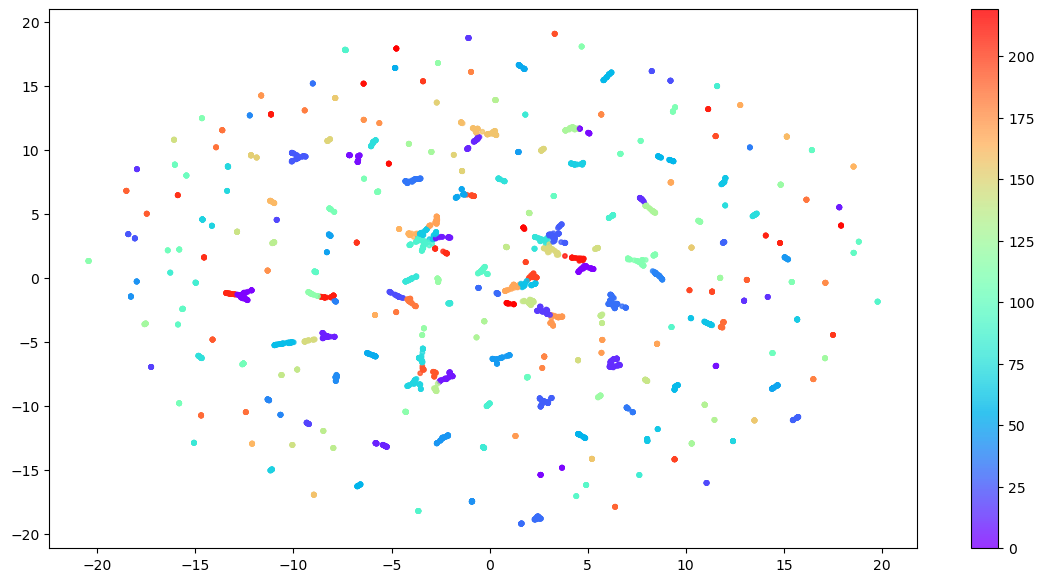

In [106]:
# Кластеризация с помощью K-Means
kmeans = KMeans(n_clusters=220)  # Укажите желаемое количество кластеров
clusters_one = kmeans.fit_predict(embeddings_umap_model_one)

# Визуализация результатов
plt.figure(figsize=(14, 7))
plt.scatter(embeddings_umap_model_one[:, 0], embeddings_umap_model_one[:, 1], c=clusters_one, cmap='rainbow', s=10, alpha=0.8)
plt.colorbar()
plt.show()

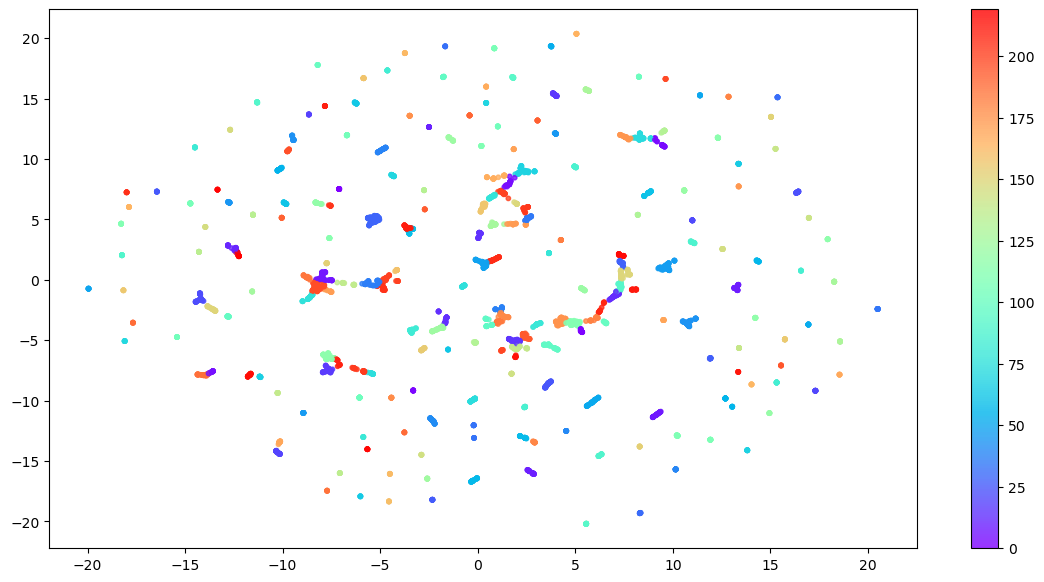

In [107]:
# Кластеризация с помощью K-Means
kmeans = KMeans(n_clusters=220)  # Укажите желаемое количество кластеров
clusters_two = kmeans.fit_predict(embeddings_umap_model_two)

# Визуализация результатов
plt.figure(figsize=(14, 7))
plt.scatter(embeddings_umap_model_two[:, 0], embeddings_umap_model_two[:, 1], c=clusters_two, cmap='rainbow', s=10, alpha=0.8)
plt.colorbar()
plt.show()

In [110]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score

# Оценка стабильности кластеров
silhouette = silhouette_score(embeddings_umap_model_one, clusters_one)
dbi = davies_bouldin_score(embeddings_umap_model_one, clusters_one)
ari = adjusted_rand_score(clusters_one, clusters_two)  # Сравниваем кластеризацию с самой собой
ami = adjusted_mutual_info_score(clusters_one, clusters_two)  # Также сравниваем с самой собой

print(f'Silhouette Score: {silhouette}')
print(f"Индекс Дэвиса-Булдина: {dbi}")
print(f'Adjusted Rand Index: {ari}')
print(f'Adjusted Mutual Information: {ami}')

Silhouette Score: 0.7691977024078369
Индекс Дэвиса-Булдина: 0.30657027542436993
Adjusted Rand Index: 0.7930931226616268
Adjusted Mutual Information: 0.9153946616290116


In [111]:
print(f'Silhouette Score: {format(round(silhouette, 2), ".2f")}')
print(f"Индекс Дэвиса-Булдина: {round(dbi, 2)}")
print(f'Adjusted Rand Index: {round(ari, 2)}')
print(f'Adjusted Mutual Information: {round(ami, 2)}')

Silhouette Score: 0.77
Индекс Дэвиса-Булдина: 0.31
Adjusted Rand Index: 0.79
Adjusted Mutual Information: 0.92


Эти метрики оценки качества кластеризации и сравнения различных кластеризаций между собой являются показателями того, насколько хорошо алгоритмы кластеризации справились с задачей разделения данных на группы.

Silhouette Score:
Значение Silhouette Score равное 0.769 указывает на хорошее разделение кластеров в данных. Чем ближе этот коэффициент к 1, тем лучше разделение. Silhouette Score учитывает, насколько объекты похожи на свой кластер по сравнению с другими кластерами.

Adjusted Rand Index (ARI):
Значение ARI равное 0.723 говорит о степени сходства между двумя различными кластеризациями. Он изменяется от -1 до 1, где 1 указывает на идентичные кластеры, а 0 или отрицательное число означает случайное разделение.

Adjusted Mutual Information (AMI):
AMI 0.890 свидетельствует о взаимной информации между двумя различными кластеризациями. Этот показатель указывает на то, насколько информация о разделении кластеров одной системой соответствует информации о кластеризации другой системой.
Таким образом, значения метрик указывают на успешное разделение данных на кластеры и хорошее сходство или взаимную информацию между разными способами кластеризации. Наличие высоких показателей подтверждает качество работы алгоритмов кластеризации в вашем случае.

# #  HDBSCAN

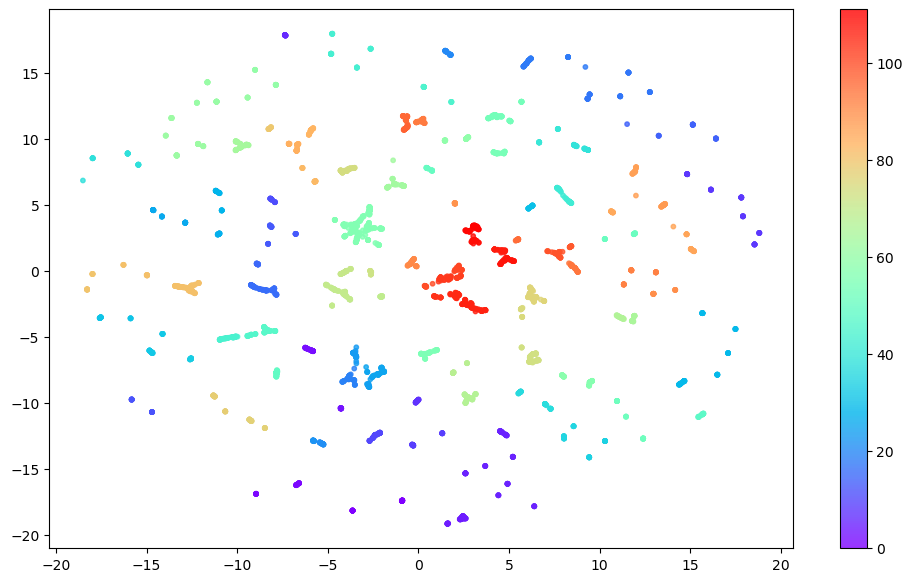

In [112]:
# Кластеризация с помощью HDBSCAN
clusterer_one = hdbscan.HDBSCAN(min_cluster_size=15)
clusters_hdbscan_one = clusterer_one.fit_predict(embeddings_umap_model_one)

# Поиск индексов элементов, относящихся к кластеру -1
indices_to_keep = np.where(clusters_hdbscan_one != -1)[0]

# Фильтрация embeddings_tsne, оставляем только элементы, не относящиеся к кластеру -1
filtered_embeddings_umap_one = embeddings_umap_model_one[indices_to_keep]

# Визуализация результатов
plt.figure(figsize=(12, 7))
plt.scatter(filtered_embeddings_umap_one[:, 0], filtered_embeddings_umap_one[:, 1], c=clusters_hdbscan_one[indices_to_keep], cmap='rainbow', s=10, alpha=0.8)
plt.colorbar()
plt.show()

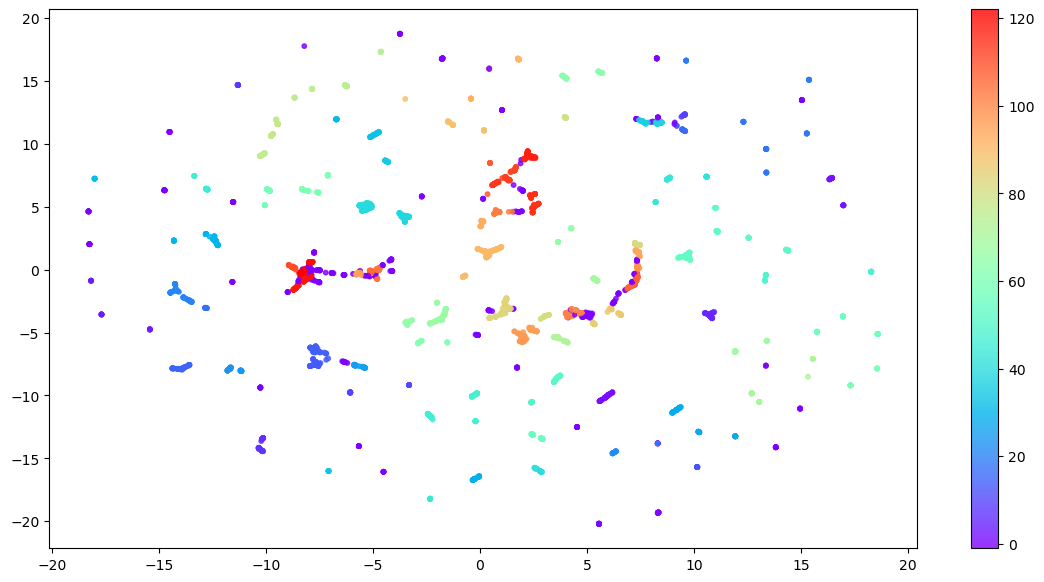

In [113]:
# Кластеризация с помощью HDBSCAN
clusterer_two = hdbscan.HDBSCAN(min_cluster_size=15)
clusters_hdbscan_two = clusterer_one.fit_predict(embeddings_umap_model_two)

# Поиск индексов элементов, относящихся к кластеру -1
indices_to_keep = np.where(clusters_hdbscan_one != -1)[0]

# Фильтрация embeddings_tsne, оставляем только элементы, не относящиеся к кластеру -1
filtered_embeddings_umap_two = embeddings_umap_model_two[indices_to_keep]

# Визуализация результатов
plt.figure(figsize=(14, 7))
plt.scatter(filtered_embeddings_umap_two[:, 0], filtered_embeddings_umap_two[:, 1], c=clusters_hdbscan_two[indices_to_keep], cmap='rainbow', s=10, alpha=0.8)
plt.colorbar()
plt.show()

In [118]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score

# Оценка стабильности кластеров
silhouette = silhouette_score(embeddings_umap_model_two, clusters_hdbscan_two)
dbi = davies_bouldin_score(embeddings_umap_model_two, clusters_hdbscan_two)
ari = adjusted_rand_score(clusters_hdbscan_one, clusters_hdbscan_two)  # Сравниваем кластеризацию с самой собой
ami = adjusted_mutual_info_score(clusters_hdbscan_one, clusters_hdbscan_two)  # Также сравниваем с самой собой

print(f'Silhouette Score: {silhouette}')
print(f"Индекс Дэвиса-Булдина: {dbi}")
print(f'Adjusted Rand Index: {ari}')
print(f'Adjusted Mutual Information: {ami}')

Silhouette Score: 0.5106737613677979
Индекс Дэвиса-Булдина: 1.3869589386200405
Adjusted Rand Index: 0.24421244347752466
Adjusted Mutual Information: 0.7468268875998375


In [119]:
print(f'Silhouette Score: {format(round(silhouette, 2), ".2f")}')
print(f"Индекс Дэвиса-Булдина: {round(dbi, 2)}")
print(f'Adjusted Rand Index: {round(ari, 2)}')
print(f'Adjusted Mutual Information: {round(ami, 2)}')

Silhouette Score: 0.51
Индекс Дэвиса-Булдина: 1.39
Adjusted Rand Index: 0.24
Adjusted Mutual Information: 0.75


In [116]:
silhouette = silhouette_score(embeddings_umap_model_two, clusters_hdbscan_two)

In [117]:
silhouette

0.51067376

In [37]:
ari = adjusted_rand_score(clusters_one, clusters_hdbscan_two)  # Сравниваем кластеризацию с самой собой
ami = adjusted_mutual_info_score(clusters_one, clusters_hdbscan_two)  # Также сравниваем с самой собой
print(f'Adjusted Rand Index: {ari}')
print(f'Adjusted Mutual Information: {ami}')

Adjusted Rand Index: 0.37111746318714933
Adjusted Mutual Information: 0.7985772228500756


# Сокращение размерности с помощью t-SNE

In [89]:
# Сокращение размерности с помощью t-SNE
tsne = TSNE(n_components=2, perplexity=50, learning_rate=200)
embeddings_tsne_one = tsne.fit_transform(embeddings_np)

In [90]:
# Сокращение размерности с помощью t-SNE
tsne = TSNE(n_components=2, perplexity=200, learning_rate=200)
embeddings_tsne_two = tsne.fit_transform(embeddings_np)

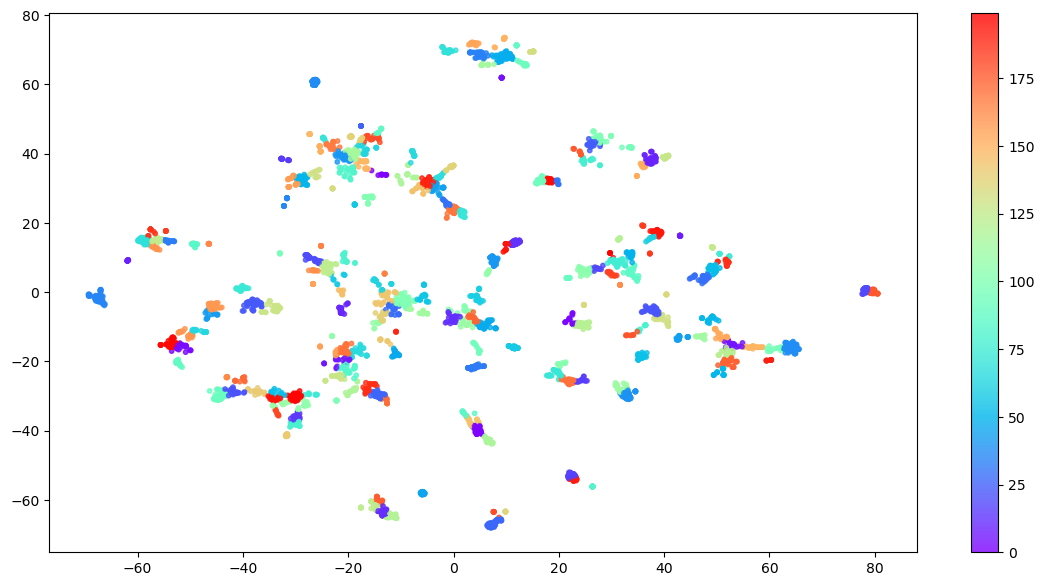

In [91]:
# Кластеризация с помощью K-Means
kmeans = KMeans(n_clusters=200)  # Укажите желаемое количество кластеров
clusters_tsne_one = kmeans.fit_predict(embeddings_tsne_one)

# Визуализация результатов
plt.figure(figsize=(14, 7))
plt.scatter(embeddings_tsne_one[:, 0], embeddings_tsne_one[:, 1], c=clusters_tsne_one, cmap='rainbow', s=10, alpha=0.8)
plt.colorbar()
plt.show()

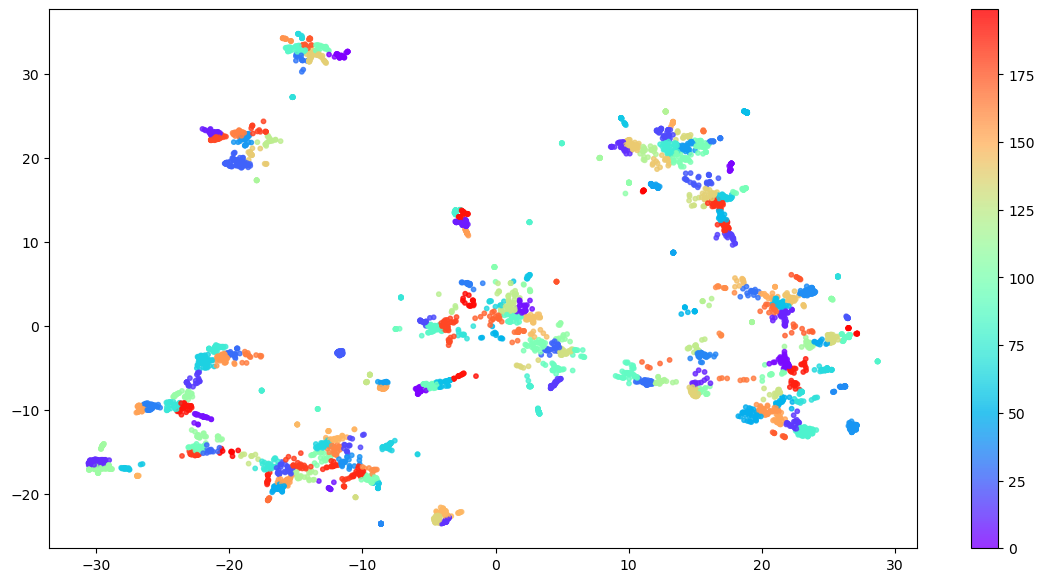

In [92]:
# Кластеризация с помощью K-Means
kmeans = KMeans(n_clusters=200)  # Укажите желаемое количество кластеров
clusters_tsne_two = kmeans.fit_predict(embeddings_tsne_two)

# Визуализация результатов
plt.figure(figsize=(14, 7))
plt.scatter(embeddings_tsne_two[:, 0], embeddings_tsne_two[:, 1], c=clusters_tsne_two, cmap='rainbow', s=10, alpha=0.8)
plt.colorbar()
plt.show()

In [98]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score

# Оценка стабильности кластеров
silhouette = silhouette_score(embeddings_tsne_one, clusters_tsne_one)
dbi = davies_bouldin_score(embeddings_tsne_one, clusters_tsne_one)
ari = adjusted_rand_score(clusters_tsne_one, clusters_tsne_two)  # Сравниваем кластеризацию с самой собой
ami = adjusted_mutual_info_score(clusters_tsne_one, clusters_tsne_two)  # Также сравниваем с самой собой

print(f'Silhouette Score: {silhouette}')
print(f"Индекс Дэвиса-Булдина: {dbi}")
print(f'Adjusted Rand Index: {ari}')
print(f'Adjusted Mutual Information: {ami}')

Silhouette Score: 0.5820780396461487
Индекс Дэвиса-Булдина: 0.5641538373218635
Adjusted Rand Index: 0.7197777799592607
Adjusted Mutual Information: 0.8670461257880258


In [99]:
print(f'Silhouette Score: {format(round(silhouette, 2), ".2f")}')
print(f"Индекс Дэвиса-Булдина: {round(dbi, 2)}")
print(f'Adjusted Rand Index: {round(ari, 2)}')
print(f'Adjusted Mutual Information: {round(ami, 2)}')

Silhouette Score: 0.58
Индекс Дэвиса-Булдина: 0.56
Adjusted Rand Index: 0.72
Adjusted Mutual Information: 0.87


In [95]:
silhouette = silhouette_score(embeddings_tsne_two, clusters_tsne_two)

In [96]:
silhouette

0.5228949

# Кластеризация с помощью HDBSCAN

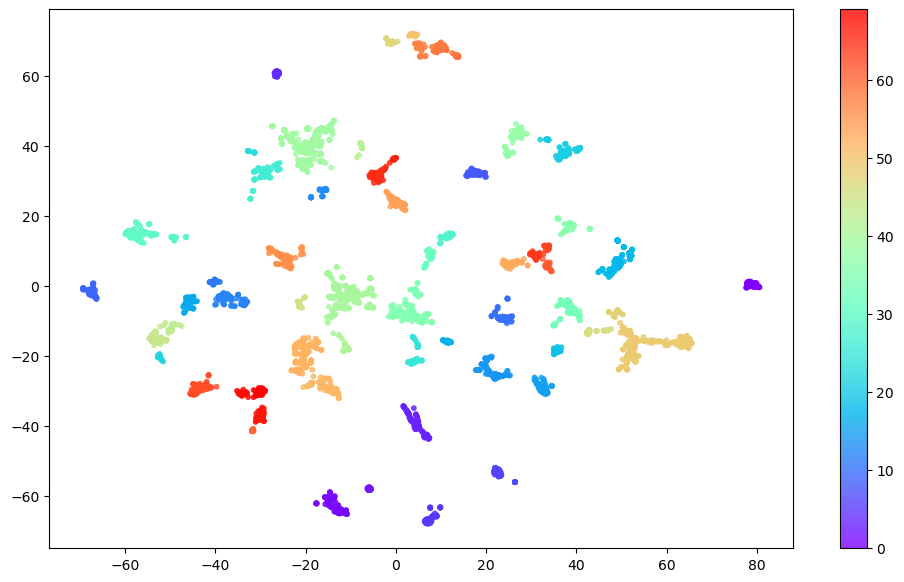

In [100]:
# Кластеризация с помощью HDBSCAN
clusterer_one = hdbscan.HDBSCAN(min_cluster_size=15)
clusters_tsne_hdbscan_one = clusterer_one.fit_predict(embeddings_tsne_one)

# Поиск индексов элементов, относящихся к кластеру -1
indices_to_keep = np.where(clusters_tsne_hdbscan_one != -1)[0]

# Фильтрация embeddings_tsne, оставляем только элементы, не относящиеся к кластеру -1
filtered_embeddings_tsne_one = embeddings_tsne_one[indices_to_keep]

# Визуализация результатов
plt.figure(figsize=(12, 7))
plt.scatter(filtered_embeddings_tsne_one[:, 0], filtered_embeddings_tsne_one[:, 1], c=clusters_tsne_hdbscan_one[indices_to_keep], cmap='rainbow', s=10, alpha=0.8)
plt.colorbar()
plt.show()

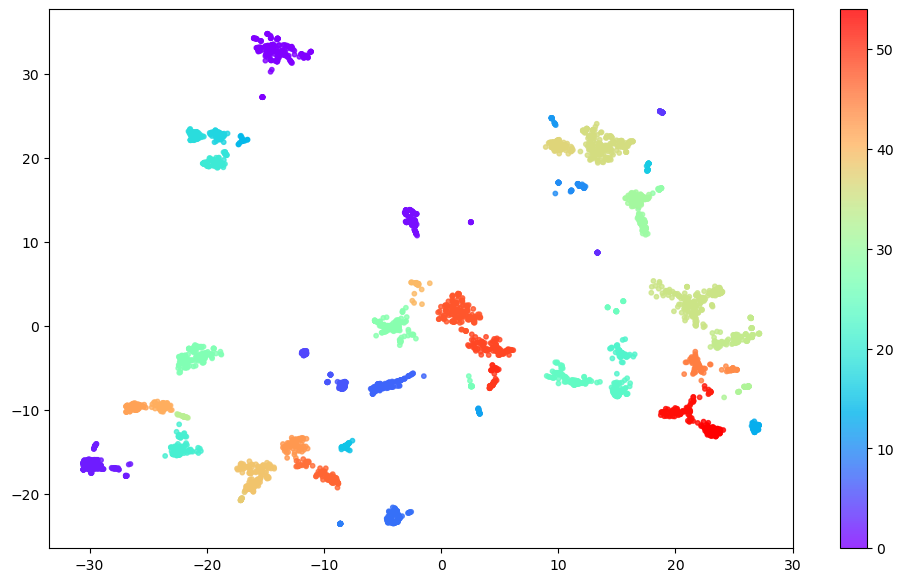

In [101]:
# Кластеризация с помощью HDBSCAN
clusterer_two = hdbscan.HDBSCAN(min_cluster_size=15)
clusters_tsne_hdbscan_two = clusterer_two.fit_predict(embeddings_tsne_two)

# Поиск индексов элементов, относящихся к кластеру -1
indices_to_keep = np.where(clusters_tsne_hdbscan_two != -1)[0]

# Фильтрация embeddings_tsne, оставляем только элементы, не относящиеся к кластеру -1
filtered_embeddings_tsne_two = embeddings_tsne_two[indices_to_keep]

# Визуализация результатов
plt.figure(figsize=(12, 7))
plt.scatter(filtered_embeddings_tsne_two[:, 0], filtered_embeddings_tsne_two[:, 1], c=clusters_tsne_hdbscan_two[indices_to_keep], cmap='rainbow', s=10, alpha=0.8)
plt.colorbar()
plt.show()

In [102]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score

# Оценка стабильности кластеров
silhouette = silhouette_score(embeddings_tsne_one, clusters_tsne_hdbscan_one)
dbi = davies_bouldin_score(embeddings_tsne_one, clusters_tsne_hdbscan_one)
ari = adjusted_rand_score(clusters_tsne_hdbscan_one, clusters_tsne_hdbscan_two)  # Сравниваем кластеризацию с самой собой
ami = adjusted_mutual_info_score(clusters_tsne_hdbscan_one, clusters_tsne_hdbscan_two)  # Также сравниваем с самой собой

print(f'Silhouette Score: {silhouette}')
print(f"Индекс Дэвиса-Булдина: {round(dbi, 2)}")
print(f'Adjusted Rand Index: {ari}')
print(f'Adjusted Mutual Information: {ami}')

Silhouette Score: 0.4751163721084595
Индекс Дэвиса-Булдина: 1.27
Adjusted Rand Index: 0.4239496119219853
Adjusted Mutual Information: 0.8142658043335007


In [103]:
print(f'Silhouette Score: {format(round(silhouette, 2), ".2f")}')
print(f"Индекс Дэвиса-Булдина: {round(dbi, 2)}")
print(f'Adjusted Rand Index: {round(ari, 2)}')
print(f'Adjusted Mutual Information: {round(ami, 2)}')

Silhouette Score: 0.48
Индекс Дэвиса-Булдина: 1.27
Adjusted Rand Index: 0.42
Adjusted Mutual Information: 0.81


#  Метод снижения размерности: метод главных компонент (Principal Component Analysis, PCA)

In [79]:
from sklearn.decomposition import PCA

# Создание объекта PCA с двумя компонентами
pca = PCA(n_components=2)

# Преобразование векторов embeddings_np в новое пространство меньшей размерности
embeddings_pca_one = pca.fit_transform(embeddings_np)

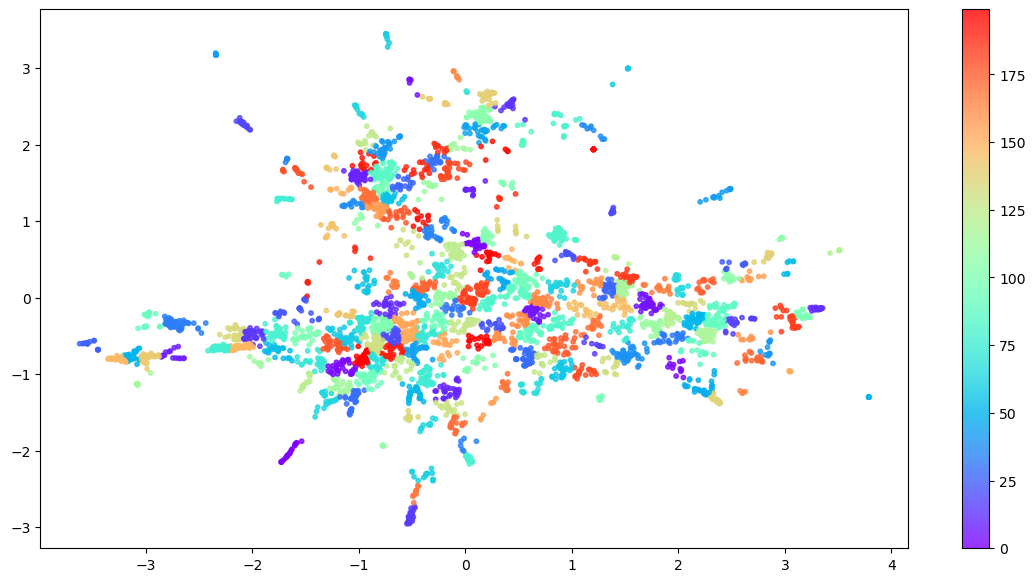

In [80]:
# Кластеризация с помощью K-Means
kmeans = KMeans(n_clusters=200)  # Укажите желаемое количество кластеров
clusters_pca_one = kmeans.fit_predict(embeddings_pca_one)

# Визуализация результатов
plt.figure(figsize=(14, 7))
plt.scatter(embeddings_pca_one[:, 0], embeddings_pca_one[:, 1], c=clusters_pca_one, cmap='rainbow', s=10, alpha=0.8)
plt.colorbar()
plt.show()

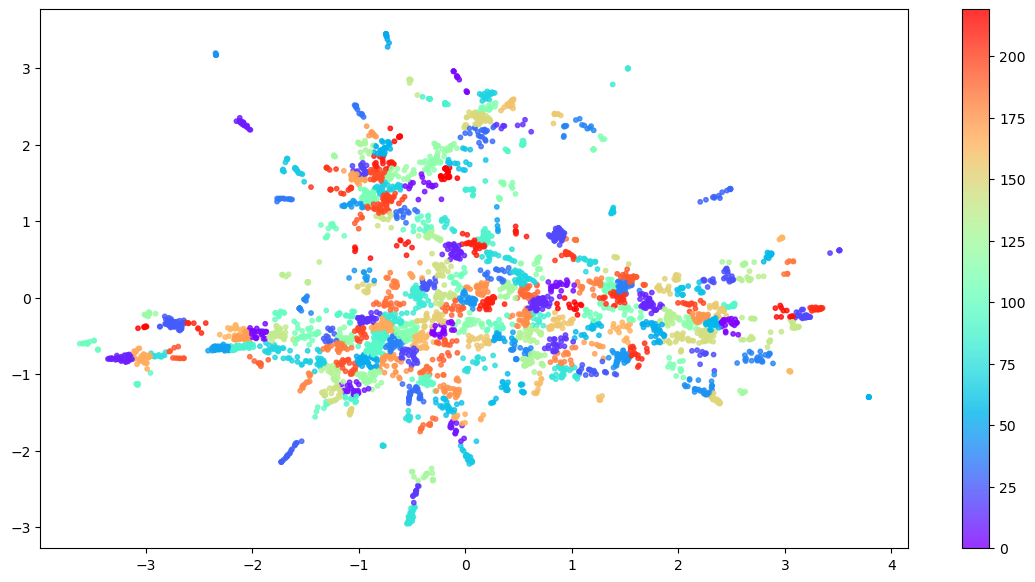

In [82]:
# Кластеризация с помощью K-Means
kmeans = KMeans(n_clusters=220)  # Укажите желаемое количество кластеров
clusters_pca_two = kmeans.fit_predict(embeddings_pca_one)

# Визуализация результатов
plt.figure(figsize=(14, 7))
plt.scatter(embeddings_pca_one[:, 0], embeddings_pca_one[:, 1], c=clusters_pca_two, cmap='rainbow', s=10, alpha=0.8)
plt.colorbar()
plt.show()

In [83]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import davies_bouldin_score

# Оценка стабильности кластеров
silhouette = silhouette_score(embeddings_pca_one, clusters_pca_one)
ari = adjusted_rand_score(clusters_pca_one, clusters_pca_two)  # Сравниваем кластеризацию с самой собой
dbi = davies_bouldin_score(embeddings_pca_one, clusters_pca_one)
ami = adjusted_mutual_info_score(clusters_pca_one, clusters_pca_two)  # Также сравниваем с самой собой

print(f'Silhouette Score: {silhouette}')
print(f"Индекс Дэвиса-Булдина: {dbi}")
print(f'Adjusted Rand Index: {ari}')
print(f'Adjusted Mutual Information: {ami}')

Silhouette Score: 0.4650397002696991
Индекс Дэвиса-Булдина: 0.6596600863914043
Adjusted Rand Index: 0.703508755236821
Adjusted Mutual Information: 0.8651222110256822


In [84]:
print(f'Silhouette Score: {format(round(silhouette, 2), ".2f")}')
print(f"Индекс Дэвиса-Булдина: {round(dbi, 2)}")
print(f'Adjusted Rand Index: {round(ari, 2)}')
print(f'Adjusted Mutual Information: {round(ami, 2)}')

Silhouette Score: 0.47
Индекс Дэвиса-Булдина: 0.66
Adjusted Rand Index: 0.7
Adjusted Mutual Information: 0.87


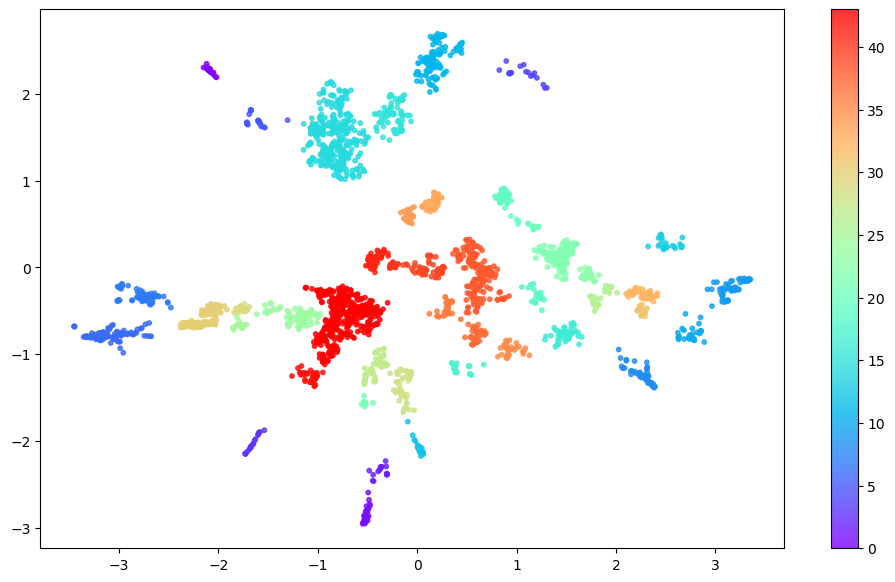

In [85]:
# Кластеризация с помощью HDBSCAN
clusterer_one = hdbscan.HDBSCAN(min_cluster_size=15)
clusters_pca_hdbscan_one = clusterer_one.fit_predict(embeddings_pca_one)

# Поиск индексов элементов, относящихся к кластеру -1
indices_to_keep = np.where(clusters_pca_hdbscan_one != -1)[0]

# Фильтрация embeddings_tsne, оставляем только элементы, не относящиеся к кластеру -1
filtered_embeddings_pca_one = embeddings_pca_one[indices_to_keep]

# Визуализация результатов
plt.figure(figsize=(12, 7))
plt.scatter(filtered_embeddings_pca_one[:, 0], filtered_embeddings_pca_one[:, 1], c=clusters_pca_hdbscan_one[indices_to_keep], cmap='rainbow', s=10, alpha=0.8)
plt.colorbar()
plt.show()

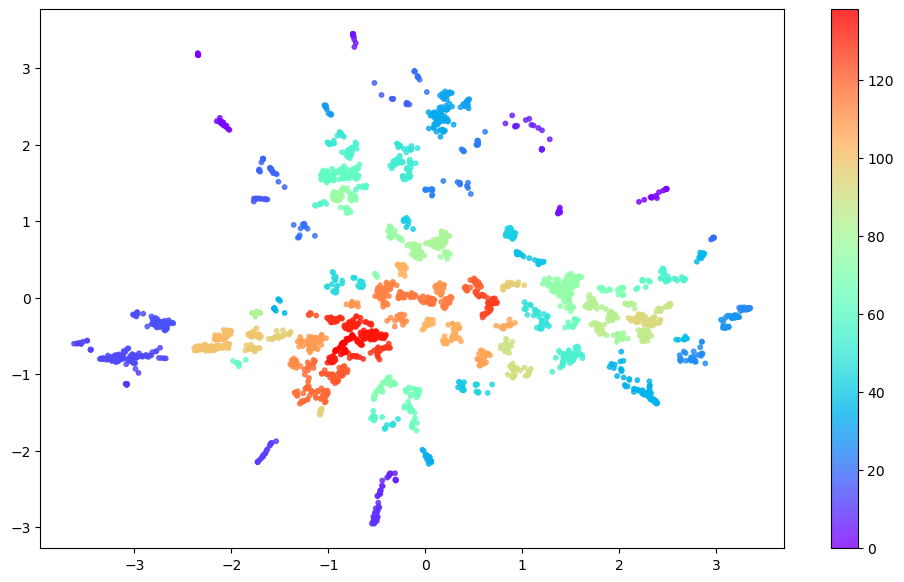

In [86]:
# Кластеризация с помощью HDBSCAN
clusterer_two = hdbscan.HDBSCAN(min_cluster_size=7)
clusters_pca_hdbscan_two = clusterer_two.fit_predict(embeddings_pca_one)

# Поиск индексов элементов, относящихся к кластеру -1
indices_to_keep = np.where(clusters_pca_hdbscan_two != -1)[0]

# Фильтрация embeddings_tsne, оставляем только элементы, не относящиеся к кластеру -1
filtered_embeddings_pca_two = embeddings_pca_one[indices_to_keep]

# Визуализация результатов
plt.figure(figsize=(12, 7))
plt.scatter(filtered_embeddings_pca_two[:, 0], filtered_embeddings_pca_two[:, 1], c=clusters_pca_hdbscan_two[indices_to_keep], cmap='rainbow', s=10, alpha=0.8)
plt.colorbar()
plt.show()

In [87]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import davies_bouldin_score

# Оценка стабильности кластеров
silhouette = silhouette_score(embeddings_pca_one, clusters_pca_hdbscan_one)
ari = adjusted_rand_score(clusters_pca_hdbscan_one, clusters_pca_hdbscan_two)  # Сравниваем кластеризацию с самой собой
dbi = davies_bouldin_score(embeddings_pca_one, clusters_pca_hdbscan_one)
ami = adjusted_mutual_info_score(clusters_pca_hdbscan_one, clusters_pca_hdbscan_two)  # Также сравниваем с самой собой

print(f'Silhouette Score: {silhouette}')
print(f'Adjusted Rand Index: {ari}')
print(f"Индекс Дэвиса-Булдина: {dbi}")
print(f'Adjusted Mutual Information: {ami}')

Silhouette Score: 0.02318381704390049
Adjusted Rand Index: 0.2723640034616946
Индекс Дэвиса-Булдина: 1.7896614875936563
Adjusted Mutual Information: 0.5974747699848446


In [88]:
print(f'Silhouette Score: {format(round(silhouette, 2), ".2f")}')
print(f"Индекс Дэвиса-Булдина: {round(dbi, 2)}")
print(f'Adjusted Rand Index: {round(ari, 2)}')
print(f'Adjusted Mutual Information: {round(ami, 2)}')

Silhouette Score: 0.02
Индекс Дэвиса-Булдина: 1.79
Adjusted Rand Index: 0.27
Adjusted Mutual Information: 0.6
